In [44]:
%matplotlib inline

import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pandas as pd
from glob import iglob

In [45]:
im = imageio.imread("./imagenes/s3/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [46]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [47]:
im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


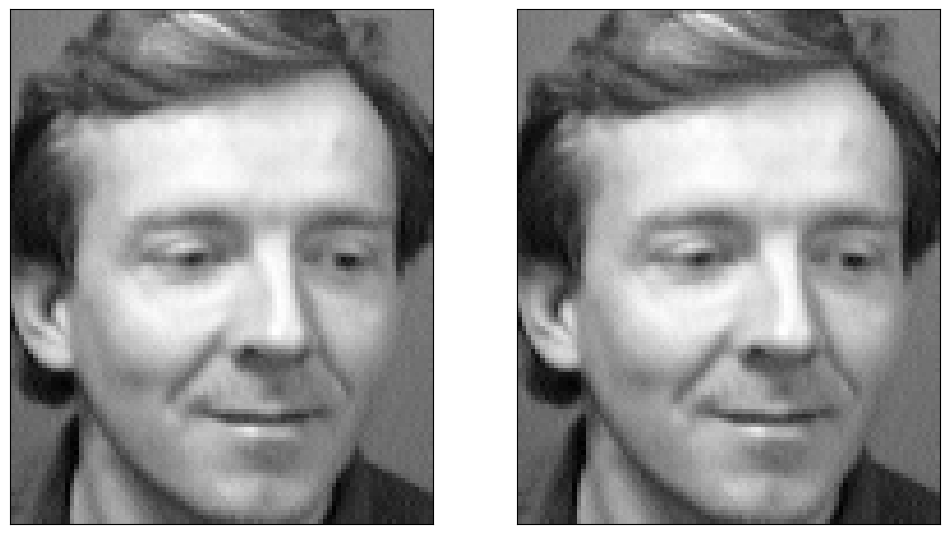

In [48]:
fix, ax = plt.subplots(1, 2, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks':[]})

ax[0].imshow(im_original, cmap="gray")
ax[1].imshow(im, cmap="gray")

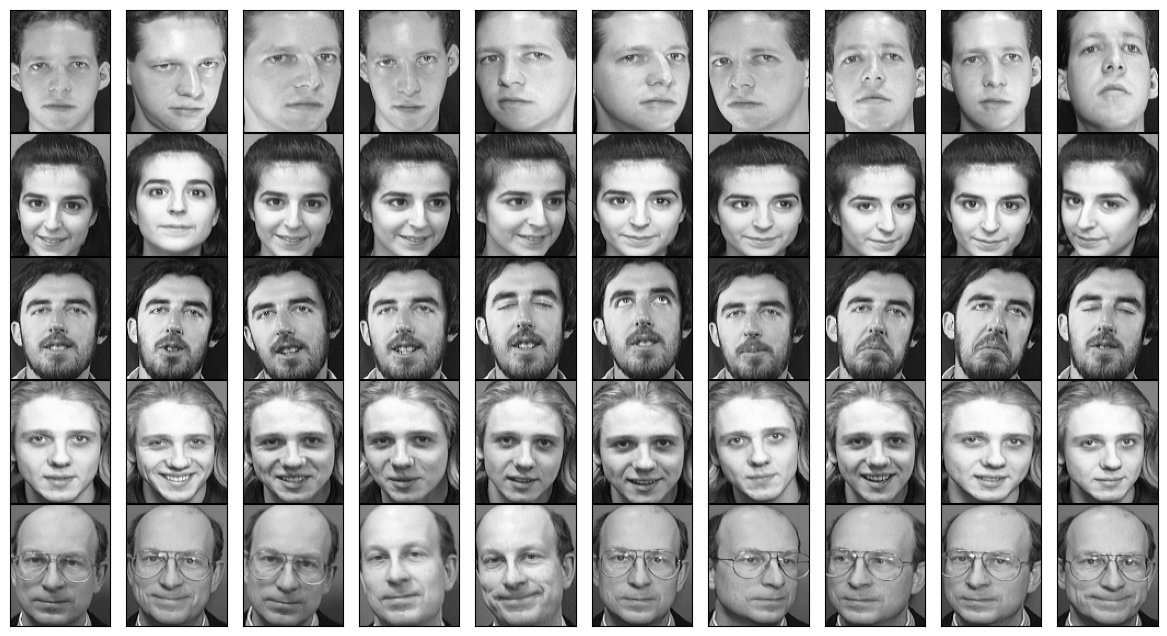

In [49]:
caras = []

# Leer y aplanar todas las imágenes
for path in iglob('./imagenes/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras.append(cara)

# Unir todas las caras en un DataFrame
caras = pd.concat(caras, axis=1).T  # Transpuesta para tener una imagen por fila

# Mostrar 50 imágenes (5 filas x 10 columnas)
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    if i < len(caras):
        ax.imshow(caras.iloc[i].values.reshape(112, 92), cmap="gray")

#plt.tight_layout()
#plt.show()

In [50]:
from sklearn.decomposition import PCA

In [51]:
caras_pca = PCA(n_components=0.999)

caras_pca.fit(caras)

,n_components,0.999
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


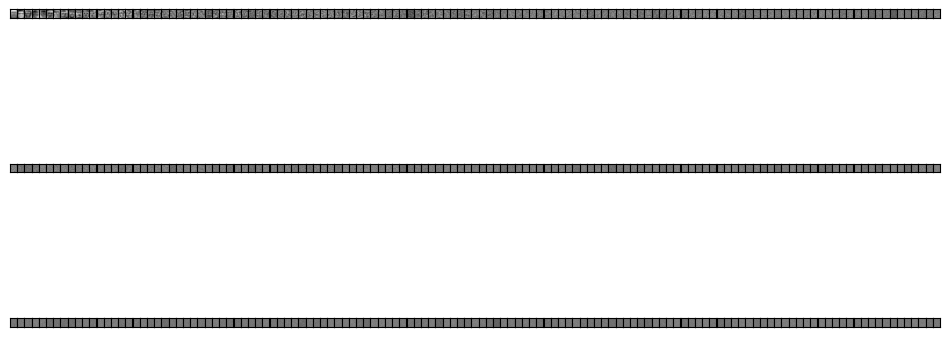

In [52]:
filas=3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    if i < len(caras):
        ax.imshow(caras_pca.components_[i].reshape(112, 92), cmap="gray")

In [53]:
print(caras_pca.n_components_)

388


In [54]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

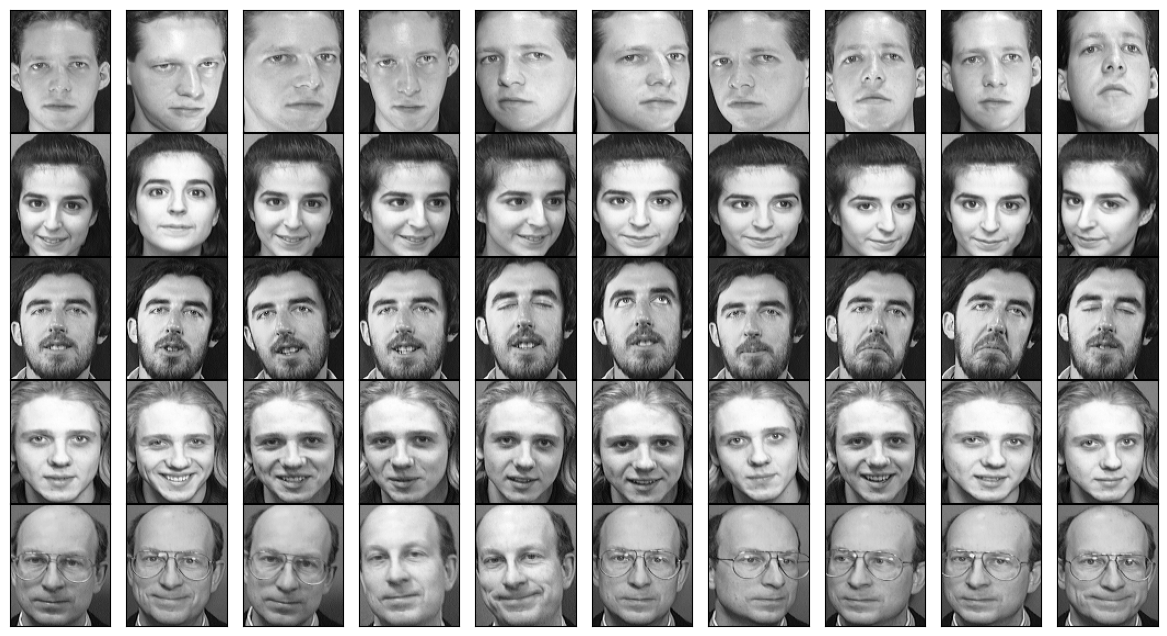

In [55]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    if i < len(caras):
        ax.imshow(proyeccion[i].reshape(112, 92), cmap="gray")